In [131]:
"""
    Package Installation
"""
__author__ = "SakibApon"
__email__ = "sakibapon7@gmail.com"

import os
import pywt
import numpy as np
import pandas as pd
from numpy import argmax
import matplotlib.pyplot as plt
from pandas import DataFrame

import graphviz
import xgboost as xgb
from xgboost import plot_tree
from scipy import signal

import sklearn
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [132]:
data = pd.read_csv('../input/bledataset/BLE_rssi_after_FFT_Filter_Grid_1.5m_1.25m.csv')

data = data.drop(['date'],axis=1)

#Performance List
l = []

## CWT Fine-Tuning

In [9]:
for j in range(1,10):
    t = j
    widths = np.arange(1, len(data)+1)

    for k in range(1,t):
        for i in range(1,6):
            cwtmatr = signal.cwt(data.iloc[:,i], signal.ricker, widths)
            (cA, cD) = pywt.dwt([1,2,3,4,5,6], 'db1')

            cwtmatr=cwtmatr.astype(int)
            data.iloc[:,i]=cwtmatr[:,0]
            
    X = data.iloc[:,1:]
    y = data.iloc[:,0]

    #Encoder
    le = LabelEncoder()
    y = le.fit_transform(y)

    trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 0)

    xgb_classifier = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.2, n_estimators = 300, objective='multi:softprob', booster='gbtree',  min_child_weight  =  6)
    xgb_classifier.fit(trainX, trainY)
    predY_XGB = xgb_classifier.predict(testX)

    modelName = "XGB_CTW_{}".format(j)
    accuracy = round(accuracy_score(testY, predY_XGB),4)*100 
    precision = round(precision_score(testY, predY_XGB, average='micro'),4)*100 
    recall = round(recall_score(testY, predY_XGB, average='micro'),4)*100 
    f1 = round(f1_score(testY, predY_XGB, average='micro'),4)*100

    l.append([modelName, accuracy, precision, recall, f1])

In [10]:
df = DataFrame (l, columns=[ 'Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
df = df.sort_values(by='Accuracy', ascending= True)
df

,Model,Accuracy,Precision,Recall,F1-Score
5,XGB_CTW_6,4.31,4.31,4.31,4.31
8,XGB_CTW_9,18.32,18.32,18.32,18.32
6,XGB_CTW_7,19.26,19.26,19.26,19.26
7,XGB_CTW_8,21.61,21.61,21.61,21.61
0,XGB_CTW_1,84.03,84.03,84.03,84.03
1,XGB_CTW_2,95.54,95.54,95.54,95.54
2,XGB_CTW_3,97.10,97.10,97.10,97.10
4,XGB_CTW_5,97.34,97.34,97.34,97.34
3,XGB_CTW_4,98.04,98.04,98.04,98.04


In [ ]:
cw = []
for i in l:
    cw.append(i[1])

<Figure size 432x288 with 0 Axes>

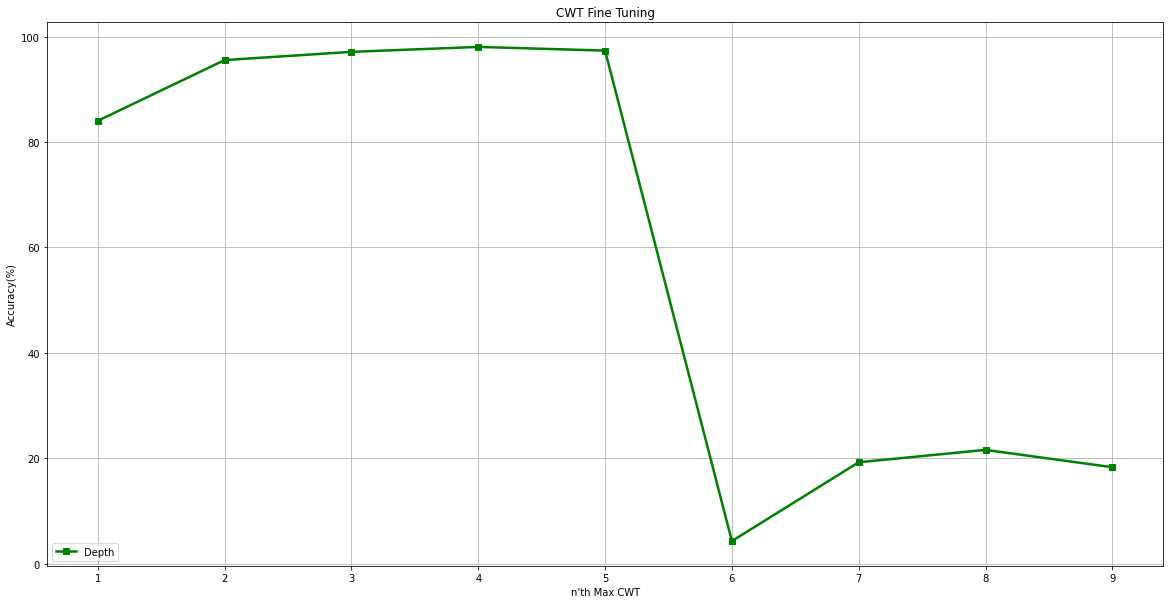

In [21]:
x=[1, 2, 3, 4, 5, 6, 7, 8, 9]

fig = plt.figure()

plt.figure(figsize=(20,10))

plt.plot(x[0:9], cw[0:9],'g', linewidth = '2.5', marker='s')
plt.title('CWT Fine Tuning')
plt.ylabel('Accuracy(%)')
plt.xlabel("n'th Max CWT")
plt.legend(['Depth', 'Min child weight'], loc='lower left')
plt.grid()

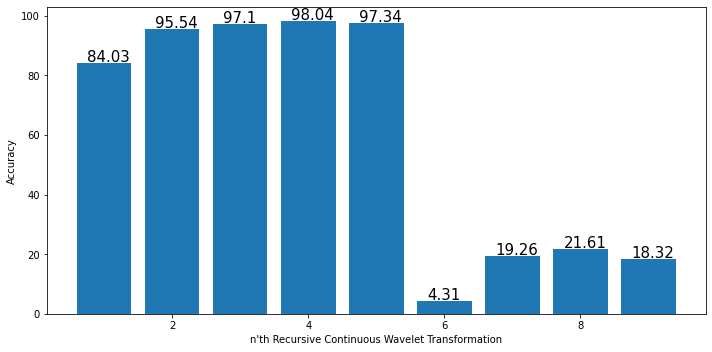

In [127]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = cw

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,cw)

for index,data in enumerate(cw):
    plt.text(x=index + .75 , y = data + .5 , s=f"{data}" , fontdict=dict(fontsize=15))
#plt.title('Continuous Wavelet Transformation Tuning')
plt.ylabel('Accuracy')
plt.xlabel("n'th Recursive Continuous Wavelet Transformation")  
plt.show()

Text(0, 0.5, "n'th Recursive Continuous Wavelet Transformation")

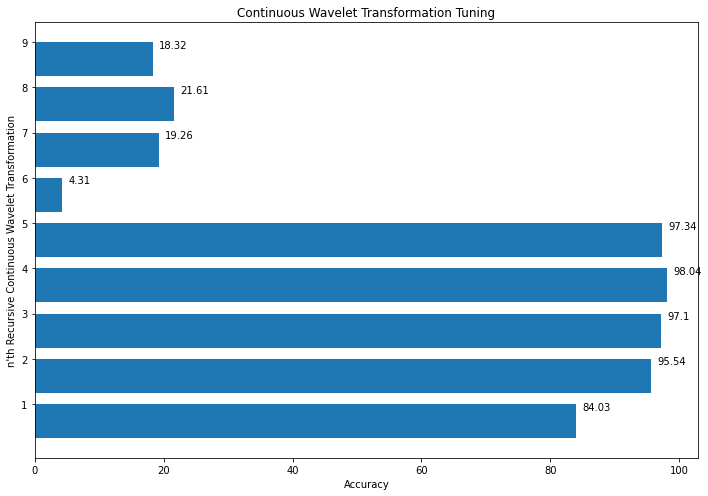

In [121]:
import os
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [84.03, 95.54, 97.1, 98.04, 97.34, 4.31, 19.26, 21.61, 18.32]

fig, ax = plt.subplots(figsize = (10,7))    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups

for i, v in enumerate(y):
    ax.text(v + 1, i + .25, str(v))
    
ax.barh(ind, y, width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Continuous Wavelet Transformation Tuning')
plt.xlabel('Accuracy')
plt.ylabel("n'th Recursive Continuous Wavelet Transformation")      

## XGBoost with best RCWT

In [27]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=0)
X_oversample, y_oversample = oversample.fit_resample(X, y)

trainX, testX, trainY, testY = train_test_split(X_oversample,y_oversample, test_size = 0.2, random_state = 0)

In [28]:
xgb_classifier = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.2, n_estimators = 300, objective='multi:softprob', booster='gbtree',  min_child_weight  =  6)
xgb_classifier.fit(trainX, trainY)

predY_XGB = xgb_classifier.predict(testX)

modelName = "XGB"
accuracy = round(accuracy_score(testY, predY_XGB),4)*100 
precision = round(precision_score(testY, predY_XGB, average='micro'),4)*100 
recall = round(recall_score(testY, predY_XGB, average='micro'),4)*100 
f1 = round(f1_score(testY, predY_XGB, average='micro'),4)*100
print(accuracy, precision, recall, f1)

99.67 99.67 99.67 99.67
